# Trabajo Práctico II - Ejercicio 2
### Fernando Ezequiel pose

## Información del dataset y contexto

**Conjunto de datos de resistencia a la compresión del hormigón**

```
I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).
https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength
```
A continuación se presenta el nombre de la variables, su tipo, la unidad de medida y una breve descripción. La resistencia a compresión del concreto es el problema de regresión a tratar. El orden de este listado corresponde al orden de los números a lo largo de las filas de la base de datos.

**Name -- Data Type -- Measurement -- Description**

*   Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
*   Age -- quantitative -- Day (1~365) -- Input Variable
*   Concrete compressive strength -- quantitative -- MPa -- Output Variable

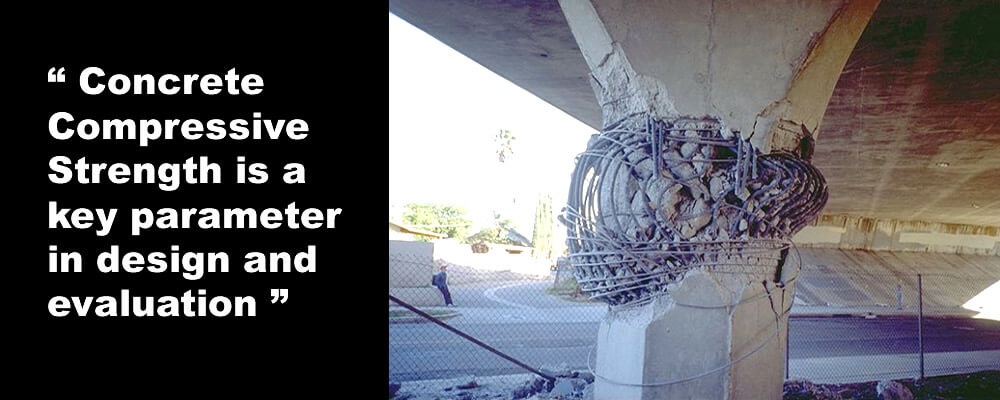

https://www.fprimec.com/how-to-evaluate-compressive-strength-of-concrete/

## Librerías Generales

In [ ]:
# Instalación de librerías que no tiene precargadas
!pip install lazypredict

In [ ]:
# Importación, visualización, manipulación de datos
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Transformación de datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Métricas y desempeño
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# LazyPredict
from lazypredict.Supervised import LazyRegressor

# Modelos
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Metricas de desempeño
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Normalización y escalamiento de los datos
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Otras
import time

## Análisis Exploratorio de Datos

In [ ]:
# Dataset desde el repositorio en Drive
!wget -c --no-check-certificate "https://drive.google.com/uc?export=download&id=1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II&confirm=t" -O dataset_hormigon_regresion.zip

# Unzip del archivo
!unzip dataset_hormigon_regresion.zip

# Lectura del dataset
dataset = pd.read_csv("dataset_hormigon_regresion.csv")

--2023-11-12 20:15:55--  https://drive.google.com/uc?export=download&id=1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II&confirm=t
Resolving drive.google.com (drive.google.com)... 142.250.97.138, 142.250.97.100, 142.250.97.102, ...
Connecting to drive.google.com (drive.google.com)|142.250.97.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/39e9cs59d19b126vmatkpbm20qt09o1i/1699820100000/12225850433951268217/*/1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II?e=download&uuid=7afe334c-497a-4223-b177-841d3749805e [following]
--2023-11-12 20:15:55--  https://doc-0s-9c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/39e9cs59d19b126vmatkpbm20qt09o1i/1699820100000/12225850433951268217/*/1BcSmbGGgqQiJOp5jYQ9QtpoLbiLaw4II?e=download&uuid=7afe334c-497a-4223-b177-841d3749805e
Resolving doc-0s-9c-docs.googleusercontent.com (doc-0s-9c-docs.googleusercontent.com)... 172.217.203

In [ ]:
# Elimino valores duplicados
vDuplicados = dataset.duplicated().sum()
if vDuplicados > 0:
    # Eliminar las filas duplicadas
    dataset.drop_duplicates(inplace=True)
    print(f'Se eliminaron {vDuplicados} filas duplicadas.')

Se eliminaron 25 filas duplicadas.


In [ ]:
dataset

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.00,0.00,0.00,162.00,2.50,1040.00,676.00,28,79.99
1,540.00,0.00,0.00,162.00,2.50,1055.00,676.00,28,61.89
2,332.50,142.50,0.00,228.00,0.00,932.00,594.00,270,40.27
3,332.50,142.50,0.00,228.00,0.00,932.00,594.00,365,41.05
4,198.60,132.40,0.00,192.00,0.00,978.40,825.50,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.40,116.00,90.30,179.60,8.90,870.10,768.30,28,44.28
1026,322.20,0.00,115.60,196.00,10.40,817.90,813.40,28,31.18
1027,148.50,139.40,108.60,192.70,6.10,892.40,780.00,28,23.70
1028,159.10,186.70,0.00,175.60,11.30,989.60,788.90,28,32.77


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1005 non-null   float64
 1   slag              1005 non-null   float64
 2   flyash            1005 non-null   float64
 3   water             1005 non-null   float64
 4   superplasticizer  1005 non-null   float64
 5   coarseaggregate   1005 non-null   float64
 6   fineaggregate     1005 non-null   float64
 7   age               1005 non-null   int64  
 8   csMPa             1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 78.5 KB


In [ ]:
dataset.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00,1005.00
mean,278.63,72.04,55.54,182.08,6.03,974.38,772.69,45.86,35.25
std,104.34,86.17,64.21,21.34,5.92,77.58,80.34,63.73,16.28
min,102.00,0.00,0.00,121.80,0.00,801.00,594.00,1.00,2.33
25%,190.70,0.00,0.00,166.60,0.00,932.00,724.30,7.00,23.52
50%,265.00,20.00,0.00,185.70,6.10,968.00,780.00,28.00,33.80
75%,349.00,142.50,118.30,192.90,10.00,1031.00,822.20,56.00,44.87
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


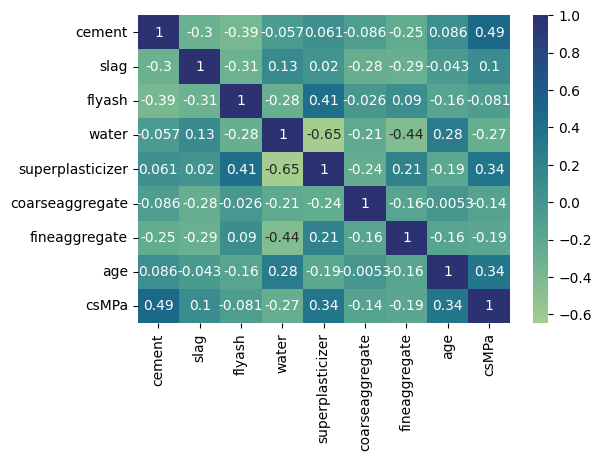

In [ ]:
sns.heatmap(data=dataset.corr(), annot=True, cmap="crest")
fig=plt.gcf()
fig.set_size_inches(6,4)
plt.show()

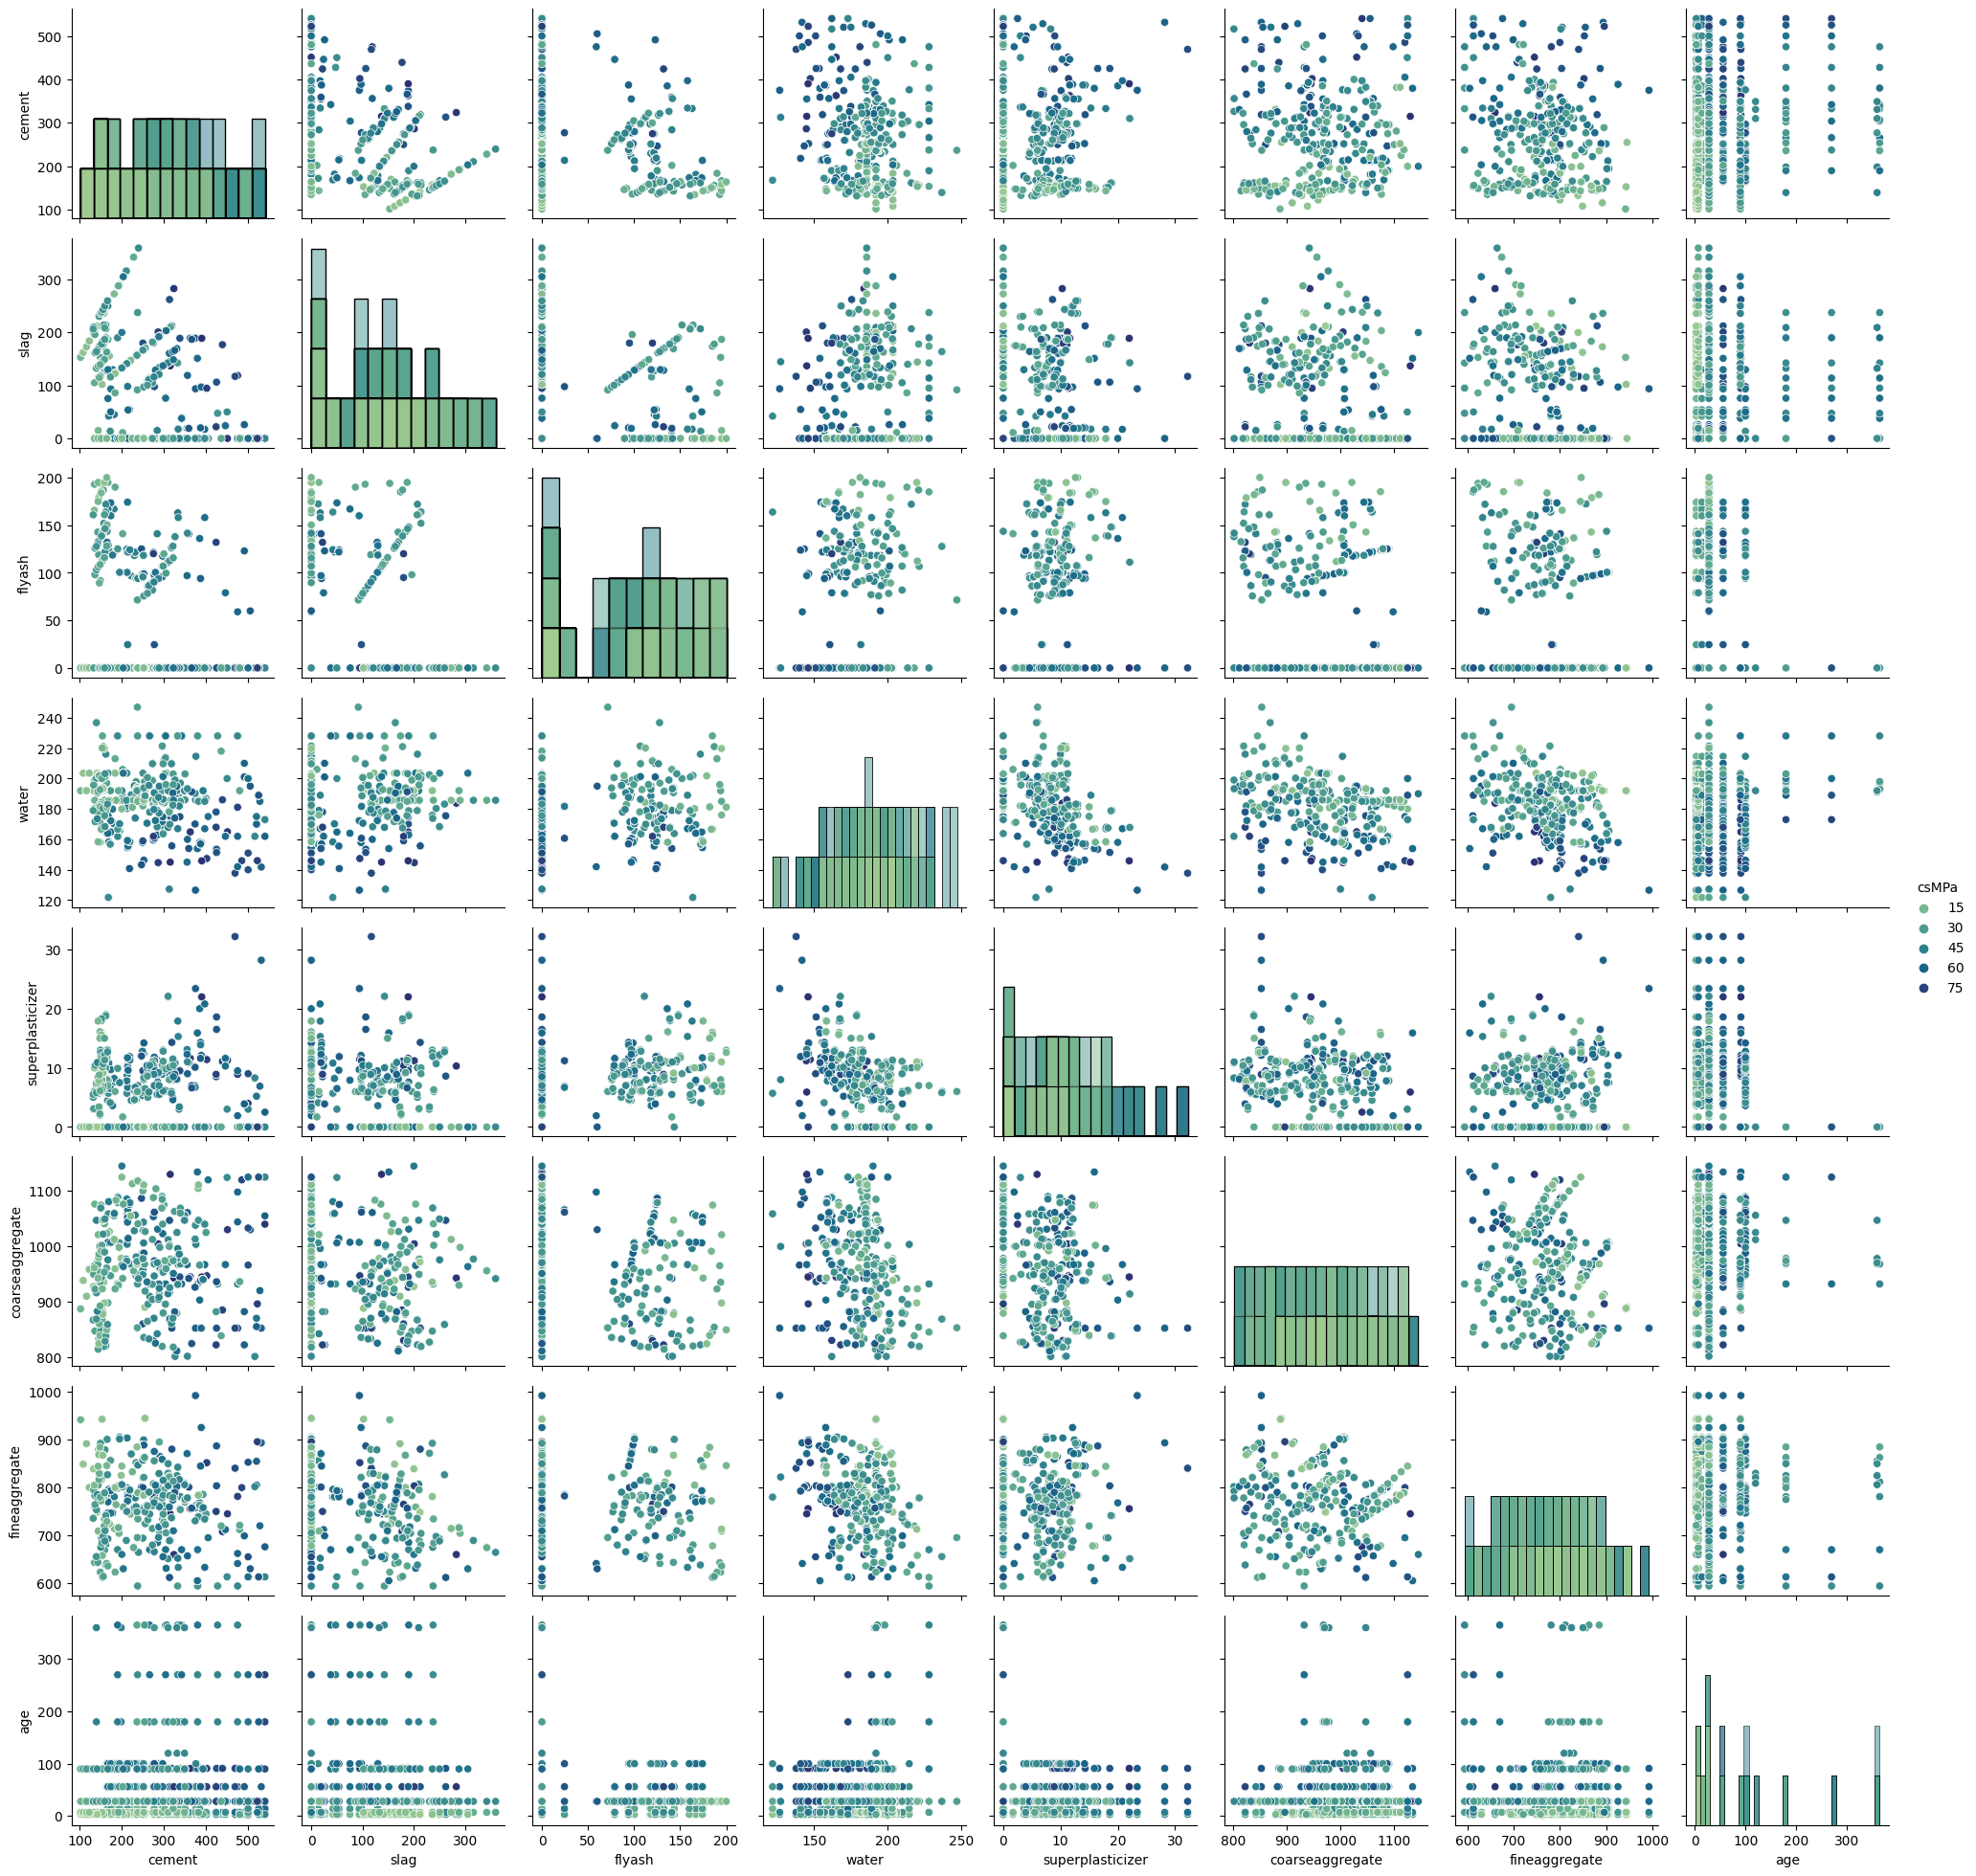

In [ ]:
g = sns.PairGrid(dataset, hue="csMPa", palette='crest')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

## Preprocesamiento

In [ ]:
# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['csMPa']
X = dataset.drop('csMPa', axis=1)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=8)

## LazyPredict

In [ ]:
clf_lazy = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None, random_state=8)
models, predictions = clf_lazy.fit(X_train, X_test, y_train, y_test)
models

100%|██████████| 42/42 [00:03<00:00, 11.05it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 703, number of used features: 8
[LightGBM] [Info] Start training from score 34.765078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.92,0.92,4.54,0.28
LGBMRegressor,0.92,0.92,4.56,0.17
HistGradientBoostingRegressor,0.91,0.91,4.65,0.33
XGBRegressor,0.90,0.91,4.89,0.20
GradientBoostingRegressor,0.90,0.90,5.02,0.23
RandomForestRegressor,0.88,0.88,5.43,0.40
BaggingRegressor,0.86,0.87,5.78,0.08
ExtraTreeRegressor,0.83,0.84,6.39,0.01
DecisionTreeRegressor,0.81,0.82,6.83,0.03


In [ ]:
# De los modelos que obtuvieron el mejor rendimiento, evaluo: LGBM, XGB, RandomForestClassifier.

# Modelo LGBM
lbmb_lazy = clf_lazy.models.get("LGBMRegressor")
# Modelo XGB
XGB_lazy = clf_lazy.models.get("XGBRegressor")
# Modelo Random Forest
RandomForest_lazy = clf_lazy.models.get("RandomForestRegressor")

## Armado del Modelo

### Funciones comunes

In [ ]:
# DataFrame para una evaluación general al final
model_performance = pd.DataFrame(columns=['MSE', 'RMSE','MAE','R-Squared','Time to Train','Time to Predict','Total Time'])

In [ ]:
def muestra_metricas(model_name, y_test, y_predic, start_time=None, end_train_time=None, end_predict_time=None):
    """
    Función simple para personalizar las métrica a imprimir para cada modelo analizado.
    model_name: string con el nombre del modelo
    y_test: recibe el vector de salida real
    y_predic: recibe el vector de salida predicho por el modelo
    """

    mses = mean_squared_error(y_test, y_predic)
    rmse = np.sqrt(mean_squared_error(y_test, y_predic))
    maes = mean_absolute_error(y_test, y_predic)
    RSquared = r2_score(y_test, y_predic)

    print("#######################################")
    print("MSE: "+ "{:.2}".format(mses))
    print("RMSE: "+ "{:.2}".format(rmse))
    print("MAE: "+ "{:.2}".format(maes))
    print("R-Squared: "+ "{:.2%}".format(RSquared))

    if (start_time != None and end_train_time != None and end_predict_time != None):
        print("Tiempo de entrenamiento: {:.4f} s".format(end_train_time-start_time))
        print("Tiempo de predicción: {:.4f} s".format(end_predict_time-end_train_time))
        print("Tiempo total: {:.4f} s".format(end_predict_time-start_time))

    print("#######################################")
    model_performance.loc[model_name] = [mses, rmse, maes, RSquared, end_train_time-start_time, end_predict_time-end_train_time, end_predict_time-start_time]


### LGBM

In [ ]:
start = time.time()

# Entrenamiento
lightgbm_clf = LGBMRegressor(objective='regression', random_state=8)
lightgbm_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_lgbm = lightgbm_clf.predict(X_test)
end_predict = time.time()

muestra_metricas("LGBMRegressor", y_test, pred_lgbm, start, end_train, end_predict)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 703, number of used features: 8
[LightGBM] [Info] Start training from score 34.765078
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

Text(0, 0.5, 'y_test')

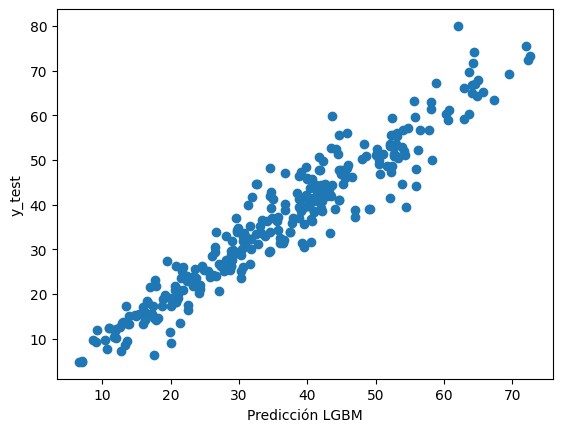

In [ ]:
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_lgbm, y=y_test)
plt.xlabel('Predicción LGBM')
plt.ylabel('y_test')

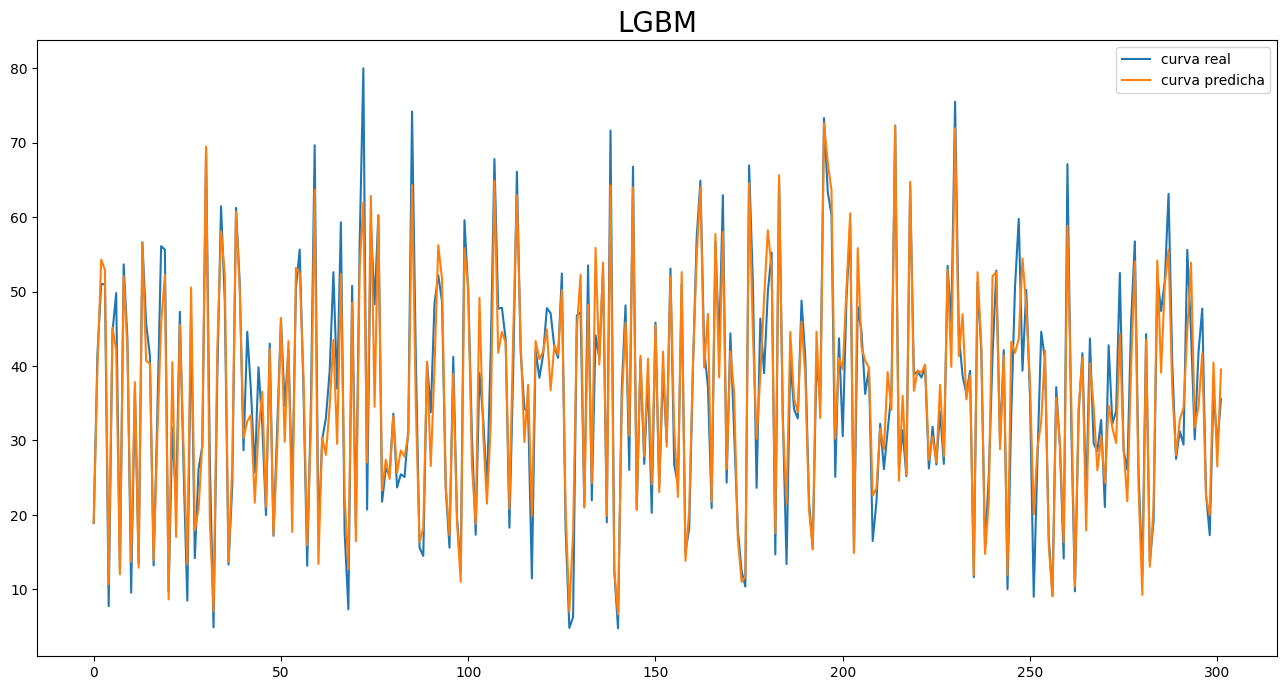

In [ ]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(16,8))

# Crearemos una trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(X_test)), y_test.values, label='curva real')

# Crearemos una trama usando datos predichos
plt.plot(np.arange(len(X_test)), pred_lgbm, label='curva predicha')

plt.title('LGBM', fontsize=20)
plt.legend()

In [ ]:
# Construimos un DataFrame para visulizar qué importancia le da el modelo a cada variable
df_importancia = pd.DataFrame(data=lightgbm_clf.feature_importances_, index=X.columns, columns=['Valores'])
df_importancia.sort_values(by='Valores', ascending=False, inplace=True)
df_importancia

,Valores
water,459
cement,437
fineaggregate,395
coarseaggregate,324
slag,298
superplasticizer,297
age,280
flyash,122


### XGB

In [ ]:
start = time.time()

# Entrenamiento
xgb_clf = XGBRegressor(random_state=8)
xgb_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_xgb = xgb_clf.predict(X_test)
end_predict = time.time()

print('RMSE: ', np.sqrt(mean_squared_error(y_test, pred_xgb)))
print('R squared: ', r2_score(y_test, pred_xgb))

muestra_metricas("XGBRegressor", y_test, pred_xgb, start, end_train, end_predict)

RMSE:  4.889135952817987
R squared:  0.9054866874347474
#######################################
MSE: 2.4e+01
RMSE: 4.9
MAE: 3.4
R-Squared: 90.55%
Tiempo de entrenamiento: 1.7689 s
Tiempo de predicción: 0.0054 s
Tiempo total: 1.7743 s
#######################################


Text(0, 0.5, 'y_test')

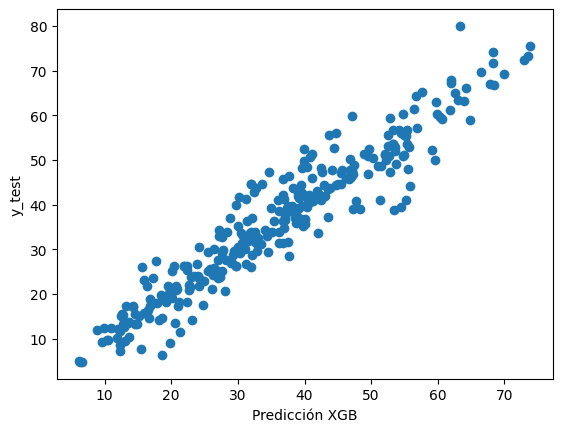

In [ ]:
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_xgb, y=y_test)

plt.xlabel('Predicción XGB')
plt.ylabel('y_test')

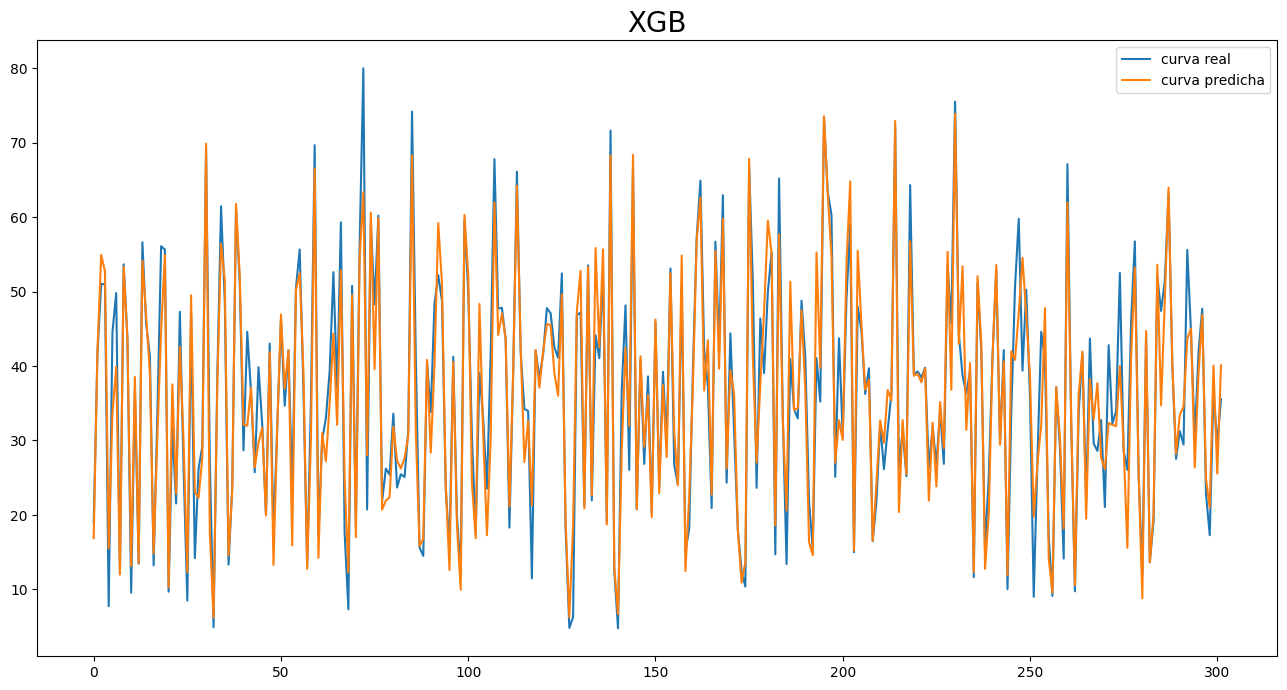

In [ ]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(16,8))

# Crearemos una trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(X_test)), y_test.values, label='curva real')

# Crearemos una trama usando datos predichos
plt.plot(np.arange(len(X_test)), pred_xgb, label='curva predicha')

plt.title('XGB', fontsize=20)
plt.legend()

In [ ]:
# Construimos un DataFrame para visulizar qué importancia le da el modelo a cada variable
df_importancia = pd.DataFrame(data=xgb_clf.feature_importances_, index=X.columns, columns=['Valores'])
df_importancia.sort_values(by='Valores', ascending=False, inplace=True)
df_importancia

,Valores
age,0.26
cement,0.22
slag,0.15
superplasticizer,0.14
water,0.13
fineaggregate,0.05
flyash,0.03
coarseaggregate,0.02


### Random Forest

In [ ]:
start = time.time()
# Entrenamiento
rf_clf = RandomForestRegressor(random_state=8)
rf_clf.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_rf = rf_clf.predict(X_test)
end_predict = time.time()

muestra_metricas("RandomForestRegressor", y_test, pred_rf, start, end_train, end_predict)

#######################################
MSE: 2.9e+01
RMSE: 5.4
MAE: 3.9
R-Squared: 88.37%
Tiempo de entrenamiento: 0.5588 s
Tiempo de predicción: 0.0099 s
Tiempo total: 0.5686 s
#######################################


Text(0, 0.5, 'y_test')

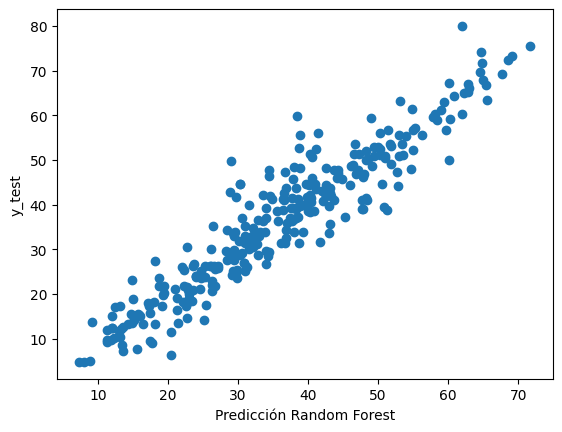

In [ ]:
# Relación entre el valor predicho y el valor real de la prueba en representación gráfica
plt.scatter(x=pred_rf, y=y_test)
plt.xlabel('Predicción Random Forest')
plt.ylabel('y_test')

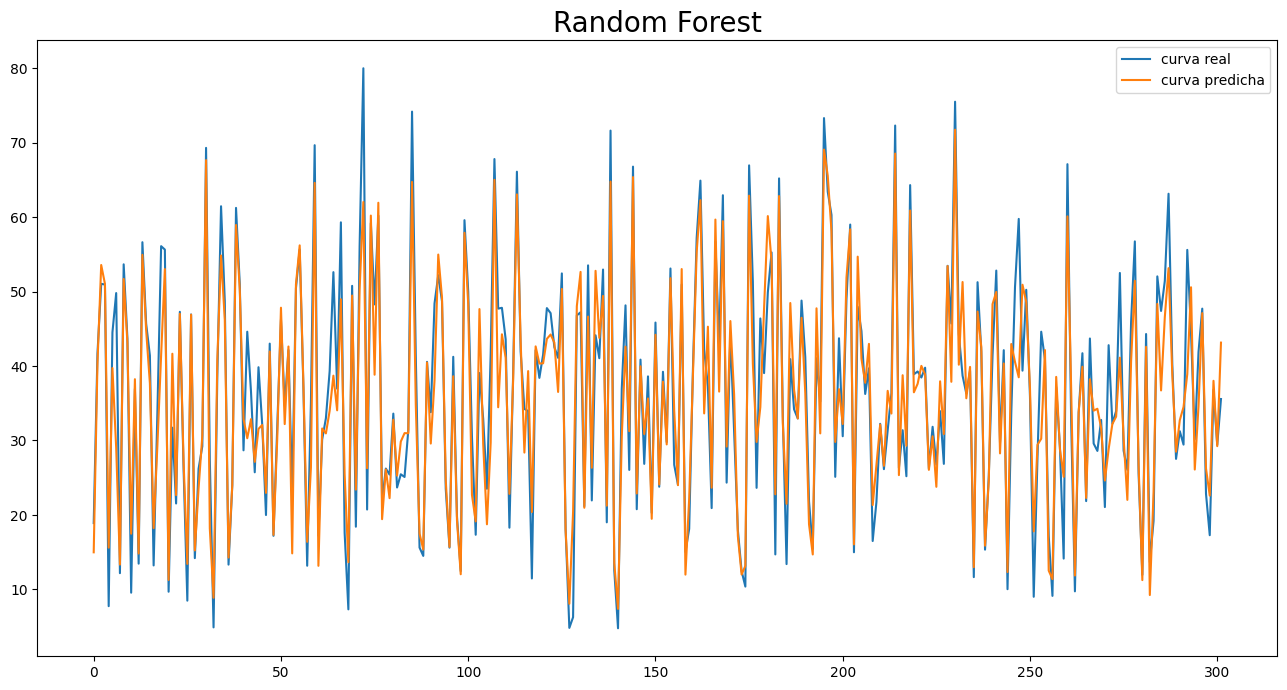

In [ ]:
# Comparación de la salida real vs predicha
plt.figure(figsize=(16,8))

# Crearemos una trama usando datos etiquetados (los reales del dataset)
plt.plot(np.arange(len(X_test)), y_test.values, label='curva real')

# Crearemos una trama usando datos predichos
plt.plot(np.arange(len(X_test)), pred_rf, label='curva predicha')

plt.title('Random Forest', fontsize=20)
plt.legend()

# La superposición de la curva verdadera y la curva predicha muestra que la
# varianza de la regresión aleatoria es menor que la de la regresión lineal.

In [ ]:
# Construimos un DataFrame para visulizar qué importancia le da el modelo a cada variable
df_importancia = pd.DataFrame(data=rf_clf.feature_importances_, index=X.columns, columns=['Valores'])
df_importancia.sort_values(by='Valores', ascending=False, inplace=True)
df_importancia

,Valores
age,0.36
cement,0.31
water,0.10
slag,0.08
superplasticizer,0.06
fineaggregate,0.04
coarseaggregate,0.03
flyash,0.02


## Otros análisis

### Random Forest (con las tres features mas importantes)
(Veo si puedo mejorarlo para alcanzar o aproximarme al LGBM)

In [ ]:
dataset_rf_opt = dataset.copy()
dataset_rf_opt.drop(['flyash', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'slag'], axis=1, inplace=True)

In [ ]:
# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset_rf_opt['csMPa']
X = dataset_rf_opt.drop('csMPa', axis=1)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=8)

In [ ]:
start = time.time()

# Entrenamiento
rf_opt = RandomForestRegressor(random_state=8)
rf_opt.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_rf_opt = rf_opt.predict(X_test)
end_predict = time.time()

muestra_metricas("RandomForestRegressor (3 características)", y_test, pred_rf_opt, start, end_train, end_predict)

#######################################
MSE: 5.1e+01
RMSE: 7.1
MAE: 5.4
R-Squared: 79.79%
Tiempo de entrenamiento: 0.2449 s
Tiempo de predicción: 0.0098 s
Tiempo total: 0.2547 s
#######################################


### Random Forest (con gridsearch)
(Veo si puedo mejorarlo para alcanzar o aproximarme al LGBM)

In [ ]:
# Definición de la columna de salida esperada (aprendizaje supervisado)
y = dataset['csMPa']
X = dataset.drop('csMPa', axis=1)

# Divisón del dataset, una parte se utiliza para el entrenamiento y la otra para testear los resultados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=8)

In [ ]:
# número de árboles en un bosque aleatorio
n_estimators = np.arange(50, 500, 25)
# número de características a considerar al buscar la mejor división
max_features = ['sqrt', 'log2']
# número mínimo de muestras requeridas para dividir un nodo
min_samples_split = [2, 4]
# número mínimo de muestras requeridas en cada nodo hoja
min_samples_leaf = [1, 2]
# método de selección de muestras para entrenar cada árbol
bootstrap = [True, False]

In [ ]:
# Creo la grilla de parámetros
param_grid = {
            "n_estimators" : n_estimators,
            "max_features" : max_features,
            "min_samples_split" : min_samples_split,
            "min_samples_leaf" : min_samples_leaf,
            "bootstrap" : bootstrap
            }

In [ ]:
start = time.time()

# Entrenamiento
rf = RandomForestRegressor(random_state=8)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)
rf_grid.fit(X_train, y_train)
end_train = time.time()

# Predicciones
pred_rf_grid = rf_grid.predict(X_test)
end_predict = time.time()

muestra_metricas("RandomForestRegressor with Grid", y_test, pred_rf_grid, start, end_train, end_predict)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
#######################################
MSE: 2.1e+01
RMSE: 4.6
MAE: 3.3
R-Squared: 91.50%
Tiempo de entrenamiento: 407.4155 s
Tiempo de predicción: 0.0111 s
Tiempo total: 407.4267 s
#######################################


### LGBM (con gridsearch)


In [ ]:
# Número máximo de hojas en un árbol.
num_leaves = [20, 30, 40]
# Tasa de aprendizaje que controla la contribución de cada árbol al modelo
learning_rate = [0.01, 0.05, 0.1]
# Profundidad máxima de cada árbol
max_depth = [5, 10, 15]
# Número mínimo de muestras necesarias para formar una nueva hoja
min_child_samples = [10, 20, 30]
# Fracción de datos a ser utilizada para el entrenamiento de cada árbol
subsample = [0.8, 0.9, 1.0]
# Fracción de features a ser utilizada para el entrenamiento de cada árbol
colsample_bytree = [0.8, 0.9, 1.0]

In [ ]:
# Creo una grilla de parámetros
param_grid = {
            "num_leaves" : num_leaves,
            "learning_rate" : learning_rate,
            "max_depth" : max_depth,
            "min_child_samples" : min_child_samples,
            "subsample" : subsample,
            "colsample_bytree" : colsample_bytree
            }

In [ ]:
start = time.time()

# Entrenamiento
lightgbm = LGBMRegressor(objective='regression', random_state=8)
lgbm_grid = GridSearchCV(estimator=lightgbm, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')
lgbm_grid.fit(X_train, y_train)  # Tardo: xxx minutos
end_train = time.time()

# Predicciones
pred_lgbm_grid = lgbm_grid.predict(X_test)
end_predict = time.time()

muestra_metricas("LGBMRegressor with Grid", y_test, pred_lgbm_grid, start, end_train, end_predict)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 855
[LightGBM] [Info] Number of data points in the train set: 703, number of used features: 8
[LightGBM] [Info] Start training from score 34.765078
#######################################
MSE: 1.8e+01
RMSE: 4.3
MAE: 3.2
R-Squared: 92.73%
Tiempo de entrenamiento: 96.8278 s
Tiempo de predicción: 0.0050 s
Tiempo total: 96.8328 s
#######################################


### Evaluación

In [ ]:
model_performance.fillna(.90,inplace=True)
model_performance = model_performance.sort_values(by='MSE', ascending=True)
model_performance.style.background_gradient(cmap='coolwarm').format({'MSE': '{:.2}',
                                                                     'RMSE': '{:.2}',
                                                                     'MAE': '{:.2}',
                                                                     'R-Squared': '{:.2%}',
                                                                     'Time to Train': '{:.2}',
                                                                     'Time to Predict':'{:.3f}',
                                                                     'Total Time':'{:.3f}',
                                                                     })

,MSE,RMSE,MAE,R-Squared,Time to Train,Time to Predict,Total Time
LGBMRegressor with Grid,1.8e+01,4.3,3.2,92.73%,9.7e+01,0.005,96.833
LGBMRegressor,2.1e+01,4.6,3.3,91.60%,0.1,0.005,0.105
RandomForestRegressor with Grid,2.1e+01,4.6,3.3,91.50%,4.1e+02,0.011,407.427
XGBRegressor,2.4e+01,4.9,3.4,90.55%,1.8,0.005,1.774
RandomForestRegressor,2.9e+01,5.4,3.9,88.37%,0.56,0.010,0.569
RandomForestRegressor (3 características),5.1e+01,7.1,5.4,79.79%,0.24,0.010,0.255
